## Learning how to use pandas, numpy, matplotlib, and networkx to get graphs from json files

Import relevant packages

In [18]:
import numpy as np
import pandas as pd
import matplotlib as plt
import json #json not actually necessary for current code 
import networkx as nx

*mediumDisease.json* is the top 37 items in the pubtator3 disease json file as accessed in October of 2025

In [19]:
df = pd.read_json('mediumDisease.json', orient='index')
#dfNorm = pd.json_normalize(df) #absolutely don't do this, deletes all
print(df.head())
print(df.info())
#print(df.describe())

            ID category   keyword set  \
emp1  40799000  Disease  MESH:D013119   
emp2  40799000  Disease  MESH:D013167   
emp3  40740000  Disease  MESH:D003141   
emp4  40765000  Disease  MESH:D016649   
emp5  40763000  Disease  MESH:D003141   

                                                keyword     source  
emp1                                      spinal trauma  PubTator3  
emp2                             ankylosing spondylitis  PubTator3  
emp3                                infectious diseases  PubTator3  
emp4  premature ovarian insufficiency|POI|Premature ...  PubTator3  
emp5                                         infectious  PubTator3  
<class 'pandas.core.frame.DataFrame'>
Index: 37 entries, emp1 to emp37
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           37 non-null     int64 
 1   category     37 non-null     object
 2   keyword set  37 non-null     object
 3   keyword      37 non-null  

In [23]:
G= nx.from_pandas_edgelist(df, "ID", "keyword") #only considers first two input columns
print(G)
print(G.edges) #gets list of edges or relationships (in same list) -> can use for main dataset
print(G.nodes)

Graph with 46 nodes and 37 edges
[(40799000, 'spinal trauma'), (40799000, 'ankylosing spondylitis'), (40740000, 'infectious diseases'), (40765000, 'premature ovarian insufficiency|POI|Premature ovarian insufficiency'), (40763000, 'infectious'), (40763000, 'stone'), (40772000, 'schizophrenia|Schizophrenia'), (40772000, 'neuroleptic malignant syndrome|NMS'), (40772000, 'catatonic symptoms|catatonia|Catatonia'), (40772000, 'neuropsychiatric condition'), (40772000, 'catatonic schizophrenia'), (40767000, 'motor'), (40767000, 'weight gain'), (40767000, 'LS|Leigh syndrome|Leigh Syndrome'), (40767000, 'Inflammation|inflammation'), (40767000, 'neuroinflammation'), (40767000, 'neurodegenerative disease'), (40569000, 'TS'), (40569000, 'XMCD'), (40769000, 'toxicity'), (40769000, 'cancer'), (40749000, 'acquired immunodeficiency syndrome'), (40749000, 'CCI'), (40749000, 'autoimmune disease'), (40749000, 'synovitis'), (40749000, 'infection'), (40749000, 'vascular disorders'), (40749000, 'pain'), (407

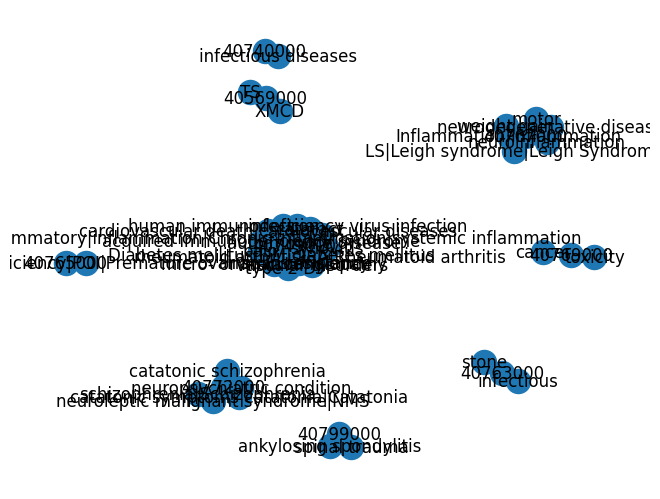

In [24]:
nx.draw(G, with_labels=True)
plt.pyplot.show()

In [26]:
H= nx.from_pandas_edgelist(df, "ID", "keyword set")
print(H)
print(H.edges) #gets list of edges or relationships (in same list) -> can use for main dataset
print(H.nodes)

Graph with 44 nodes and 37 edges
[(40799000, 'MESH:D013119'), (40799000, 'MESH:D013167'), (40740000, 'MESH:D003141'), ('MESH:D003141', 40763000), (40765000, 'MESH:D016649'), (40763000, 'MESH:D007669'), (40772000, 'MESH:D012559'), (40772000, 'MESH:D009459'), (40772000, 'MESH:D002389'), (40772000, 'MESH:D001523'), (40772000, 'MESH:D012560'), (40767000, 'MESH:D000068079'), (40767000, 'MESH:D015430'), (40767000, 'MESH:D007888'), (40767000, 'MESH:D007249'), (40767000, 'MESH:D000090862'), (40767000, 'MESH:D019636'), ('MESH:D007249', 40749000), (40569000, 'OMIM:303800'), (40569000, 'MESH:C564523'), (40769000, 'MESH:D064420'), (40769000, 'MESH:D009369'), (40749000, 'MESH:D000163'), (40749000, 'MESH:C566784'), (40749000, 'MESH:D001327'), (40749000, 'MESH:D013585'), (40749000, 'MESH:D007239'), (40749000, 'MESH:D002561'), (40749000, 'MESH:D010146'), (40749000, 'MESH:D007333'), (40749000, 'MESH:D001172'), (40749000, 'MESH:D003924'), (40749000, 'MESH:D015658'), (40749000, 'MESH:D002318'), (40749000

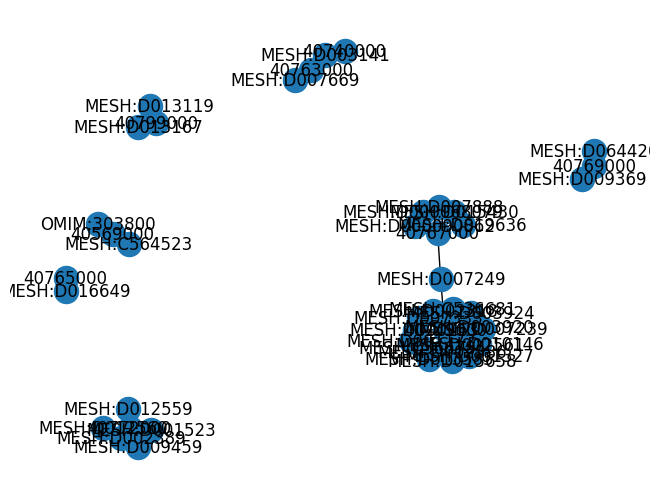

In [27]:
nx.draw(H, with_labels=True)
plt.pyplot.show()

In [46]:
J= nx.from_pandas_edgelist(df, "keyword set", "keyword")
print(J)
print(J.edges) #gets list of edges or relationships (in same list) -> can use for main dataset
edges = J.edges()
data = pd.DataFrame(edges, columns =['keyword set', 'keyword'])
print(data)
print(J.nodes)

Graph with 72 nodes and 37 edges
[('MESH:D013119', 'spinal trauma'), ('MESH:D013167', 'ankylosing spondylitis'), ('MESH:D003141', 'infectious diseases'), ('MESH:D003141', 'infectious'), ('MESH:D016649', 'premature ovarian insufficiency|POI|Premature ovarian insufficiency'), ('MESH:D007669', 'stone'), ('MESH:D012559', 'schizophrenia|Schizophrenia'), ('MESH:D009459', 'neuroleptic malignant syndrome|NMS'), ('MESH:D002389', 'catatonic symptoms|catatonia|Catatonia'), ('MESH:D001523', 'neuropsychiatric condition'), ('MESH:D012560', 'catatonic schizophrenia'), ('MESH:D000068079', 'motor'), ('MESH:D015430', 'weight gain'), ('MESH:D007888', 'LS|Leigh syndrome|Leigh Syndrome'), ('MESH:D007249', 'Inflammation|inflammation'), ('MESH:D007249', 'inflammatory|inflammation|Chronic inflammation|systemic inflammation'), ('MESH:D000090862', 'neuroinflammation'), ('MESH:D019636', 'neurodegenerative disease'), ('OMIM:303800', 'TS'), ('MESH:C564523', 'XMCD'), ('MESH:D064420', 'toxicity'), ('MESH:D009369', '

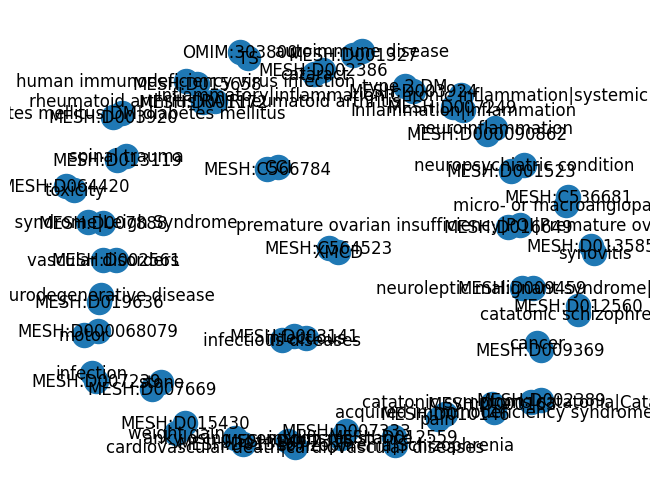

In [30]:
nx.draw(J, with_labels=True)
plt.pyplot.show()

In [42]:
K= nx.MultiGraph(nx.from_pandas_edgelist(df, "ID", "keyword")) #only considers first two input columns. don't want multi, just testing
print(K)
print(K.edges) #gets list of edges or relationships (in same list) -> can use for main dataset
print(K.nodes)
print(K.degree)

MultiGraph with 46 nodes and 37 edges
[(40799000, 'spinal trauma', 0), (40799000, 'ankylosing spondylitis', 0), (40740000, 'infectious diseases', 0), (40765000, 'premature ovarian insufficiency|POI|Premature ovarian insufficiency', 0), (40763000, 'infectious', 0), (40763000, 'stone', 0), (40772000, 'schizophrenia|Schizophrenia', 0), (40772000, 'neuroleptic malignant syndrome|NMS', 0), (40772000, 'catatonic symptoms|catatonia|Catatonia', 0), (40772000, 'neuropsychiatric condition', 0), (40772000, 'catatonic schizophrenia', 0), (40767000, 'motor', 0), (40767000, 'weight gain', 0), (40767000, 'LS|Leigh syndrome|Leigh Syndrome', 0), (40767000, 'Inflammation|inflammation', 0), (40767000, 'neuroinflammation', 0), (40767000, 'neurodegenerative disease', 0), (40569000, 'TS', 0), (40569000, 'XMCD', 0), (40769000, 'toxicity', 0), (40769000, 'cancer', 0), (40749000, 'acquired immunodeficiency syndrome', 0), (40749000, 'CCI', 0), (40749000, 'autoimmune disease', 0), (40749000, 'synovitis', 0), (40

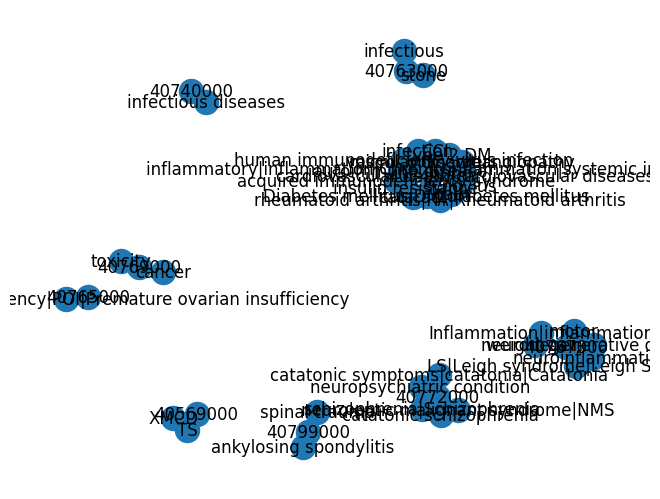

In [39]:
nx.draw(K, with_labels=True)
plt.pyplot.show()